Nelson Mandela believed education was the most powerful weapon to change the world. But not every student has equal opportunities to learn. Effective policies and plans need to be enacted in order to make education more equitable—and perhaps your innovative data analysis will help reveal the solution.

Current research shows educational outcomes are far from equitable. The imbalance was exacerbated by the COVID-19 pandemic. There's an urgent need to better understand and measure the scope and impact of the pandemic on these inequities.

Education technology company LearnPlatform was founded in 2014 with a mission to expand equitable access to education technology for all students and teachers. LearnPlatform’s comprehensive edtech effectiveness system is used by districts and states to continuously improve the safety, equity, and effectiveness of their educational technology. LearnPlatform does so by generating an evidence basis for what’s working and enacting it to benefit students, teachers, and budgets.




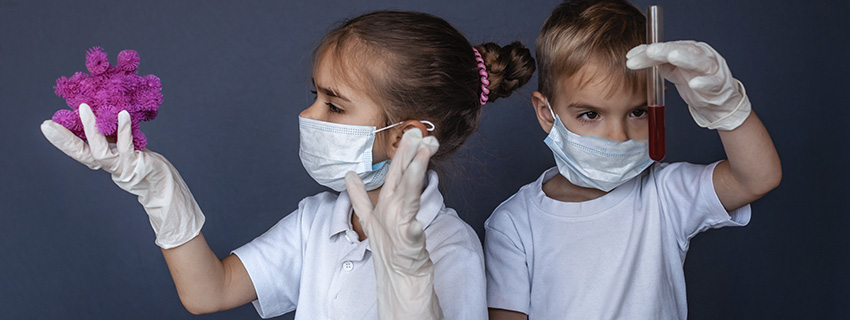 



<font size="5">Install the facebook prophet library</font>

In [ ]:
!pip install prophet

<font size="5">Import the necessary packages</font>

In [ ]:
import numpy as np
import pandas as pd 
import plotly
import plotly.express as px 
import plotly.graph_objs as go 
import matplotlib.pyplot as plt 
from plotly.offline import init_notebook_mode, plot, iplot
from plotly import tools
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



<font size="5">Load Data</font>

In [ ]:
product_info=pd.read_csv('../input/learnplatform-covid19-impact-on-digital-learning/products_info.csv')
district_info=pd.read_csv('../input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv')
product_info.head(100)


In [ ]:
district_info.head(10)

In [ ]:
product_info.info()

In [ ]:
district_info.info()

In [ ]:
district_info.describe()

In [ ]:
product_info.describe()

<font size="5">clean the missing data</font>

In [ ]:
df=district_info.dropna()
df.head(100)

<font size="5">Data Visualization using plotly library</font>




The plot below shows the distrubtion of each product over the existing sectors.

In [ ]:
fig = px.scatter(product_info, x='Product Name', y="Sector(s)")
fig.show()

In [ ]:

fig = px.scatter(df, x="state", y="district_id", color="locale",title='district_id vs state') 
fig.show()

In [ ]:
fig = px.sunburst(df, path=[ 'state','locale','pct_black/hispanic','pct_free/reduced','county_connections_ratio','pp_total_raw'])
fig.show()

In [ ]:
fig = px.sunburst(product_info, path=[ 'Product Name','Provider/Company Name','Primary Essential Function'])
fig.show()

In [ ]:
fig = px.bar(df, x='pp_total_raw', y='state', title="pp_total_raw vs state")
fig.show()

In [ ]:
fig = px.bar(df, x='state', y='county_connections_ratio', title="pp_total_raw vs state")
fig.show()

In [ ]:
fig = px.scatter_geo(df, locations="state", color="locale",
                     hover_name="locale", size="district_id")
fig.show()

In [ ]:

states = district_info.groupby(by ='state').count()[['district_id']]
#abbreviations of all the US States
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

codes = []
for i in states.index:
    codes.append(us_state_abbrev[i])
# print(codes)
data = dict(
        type = 'choropleth',
        colorscale = 'rainbow',
        locations = codes,
        locationmode = 'USA-states',
        z = list(states['district_id']),
        text = states.index,
        colorbar = {'title':'States'},
      )
layout = dict(title = 'States',
              geo = dict(projection = {'type':'mercator'})
             )
layout = dict(title= 'States with most districts mentioned',
              geo = {'scope':'usa'})

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

<font size="5">Get into engagement data</font>
############################################################################################################################

In [ ]:
data2= pd.read_csv('../input/learnplatform-covid19-impact-on-digital-learning/engagement_data/1000.csv')
data2.head(104003)

In [ ]:
data2.info()

In [ ]:
fig = px.line(data2, x='time', y="lp_id")
fig.show()

In [ ]:
fig = px.scatter(data2, x='lp_id', y="engagement_index")
fig.show()

In [ ]:
count = data2['lp_id'].value_counts()
print(count)

<font size="5">Make prediction with Facebook prophet</font>







This is used because the facebook library is awesome for modeling and predicting human behvior.

In [ ]:
data2 = data2.rename(columns = {'time': 'ds',
                                'engagement_index': 'y'})

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. projecting that onto our problem 

In [ ]:
model = Prophet()
model.fit(data2)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig=plot_components_plotly(model, forecast)
fig2=plot_plotly(model, forecast)
fig.show()
fig2.show()

<font size="5">Note that this is my first submission. Please if you found it useful then don't hesitate to encourage with your vote. thank you !!!!!!!!!!!!!!!!!! </font>
